In [1]:
#####################################################
# Copyright (c) Xuanyi Dong [GitHub D-X-Y], 2021.06 #
#####################################################
import os, sys, math
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

import torch
from xautodl.xmisc.scheduler_utils import CosineParamScheduler, MultiStepParamScheduler
from xautodl.xmisc.scheduler_utils import LRMultiplier, WarmupParamScheduler

__file__ = os.path.dirname(os.path.realpath("__file__"))

config_dir = (Path(__file__).parent / ".." / "configs").resolve()
print("The config dir path: {:}".format(config_dir))

def draw(steps, lrs):
    plt.close()
    dpi, width, height = 200, 1400, 800
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    plt.plot(steps, lrs)
    plt.title("Plot Cosine Decayed LR with Warmup")
    plt.xlabel("steps")
    plt.ylabel("learning rate")
    plt.show()

The config dir path: /Users/xuanyidong/Desktop/AutoDL-Projects/configs


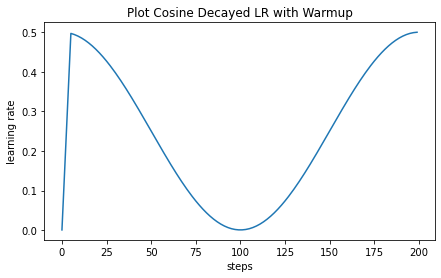

In [2]:
p = torch.nn.Parameter(torch.zeros(0))
opt = torch.optim.SGD([p], lr=5)
multiplier = WarmupParamScheduler(
    CosineParamScheduler(0.1, 0.0001),
    warmup_factor = 0.001,
    warmup_length = 0.05,
    warmup_method = 'linear'
)
total = 100
scheduler = LRMultiplier(opt, multiplier, total)
steps, lrs = [], []

for _iter in range(total * 2):
    p.sum().backward()
    opt.step()
    lrs.append(opt.param_groups[0]["lr"])
    steps.append(_iter)

    scheduler.step()
draw(steps, lrs)